1. Let G = ({1, 2, 3, 4, 5, 7, 8, 9, 10}, {1 → 2, 2 → 1, 2 → 3, 2 → 2, 3 → 4, 3 → 2, 4 → 2, 4 →
4, 4 → 5, 5 → 4, 4 → 1, 1 → 5, 9 → 10, 8 → 7, 7 → 8, 4 → 9, 10 → 7, 8 → 1}). An
agent is placed at in a vertex 1. In each step the agent chooses randomly out-going
edge and goes to the vertex pointed by this edge. Find the distribution of the position
of the agent after 2,

In [30]:
import numpy as np
import random as r
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#Let G
adjacency_matrix = np.array([
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],  
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],  
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0], 
    [1, 1, 0, 1, 1, 0, 0, 0, 1, 0], 
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],  
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]   
])

In [32]:
def run_agent(steps, adjacency_matrix):
    #An agent is placed at in a vertex 1.
    agent_position = 0

    for _ in range(steps): 
        neighbours = []
        #out-going edges
        for i in range(len(adjacency_matrix)):
            if adjacency_matrix[agent_position][i] == 1:
                neighbours.append(i)
        #in each step the agent chooses randomly out-going edge and goes to the vertex pointed by this edge
        agent_position = r.choice(neighbours)
    return agent_position

In [33]:
def run_agent_multiple_times(steps, MCS, adjacency_matrix):
    final_positions = []
    for _ in range(MCS):
        final_positions.append(run_agent(steps, adjacency_matrix))

    sns.histplot(final_positions, stat="probability", discrete=True)
    plt.title(f'Distribution after {steps} steps (MCS = {MCS})')
    plt.xlabel('Vertex')
    plt.ylabel('Probability')
    plt.show()

    # final_positions =[]
    # for i in range(MCS):
    #     final_positions.append(run_agent(steps))
    # # Postprocessing data
    # frequencies = collections.Counter(final_positions)
    # positions_ranked = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    # filename = f"{steps}_{MCS}.txt"
    # with open(filename, "w", encoding="utf8") as output_file:
    #     output_file.write("Rank\tFinal Position\tCount\tFreq\n")
    #     for rank, (position, count) in enumerate(positions_ranked, start=1):
    #         output_file.write(f"{rank}\t{position}\t{count}\t{count/MCS:.6f}\n")
    # print(f"Result saved to {filename}")

In [34]:
# Find the distribution of the position
# of the agent after 2, 3, 4, 50 and 100 steps
list_of_steps = [2,3,4,50,100]
MCS = 1000

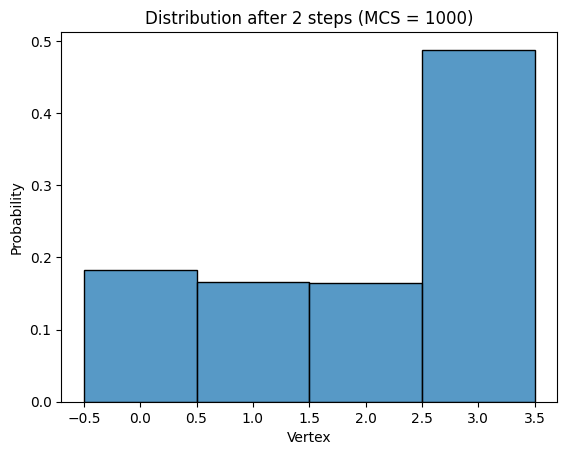

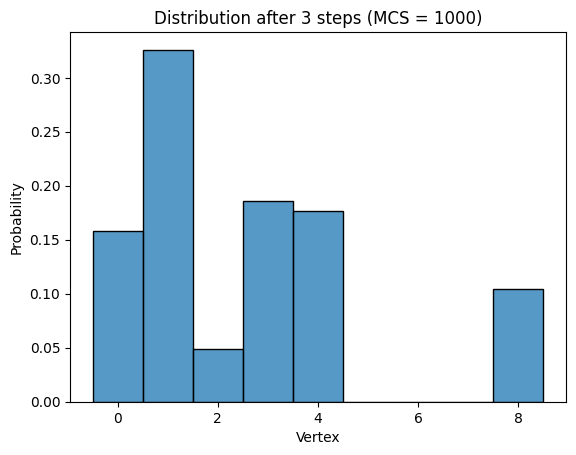

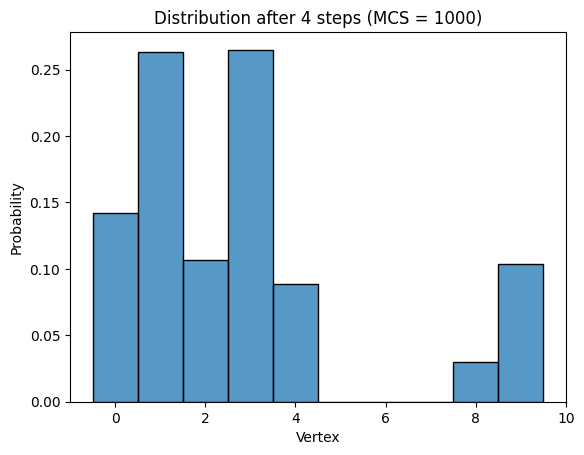

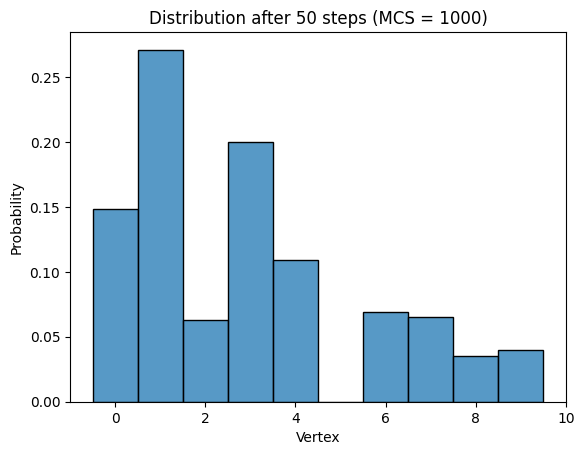

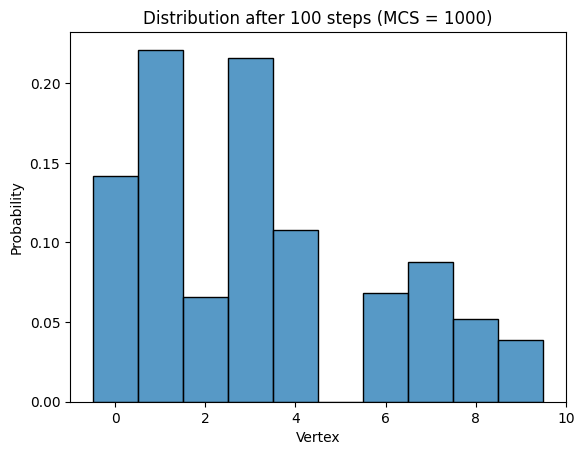

In [35]:
for steps in list_of_steps:
    run_agent_multiple_times(steps,MCS,adjacency_matrix)

2. Let G = ({1, 2, 3, 4, 5, 6}, {1 → 2, 2 → 1, 2 → 2, 2 → 6, 2 → 3, 3 → 4, 4 → 5, 5 →
6, 6 → 1, 6 → 6}). Consider a random walk on G and find numerically its ergodic
probabilities.

In [36]:
#Let G
adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0],  
    [1, 1, 1, 0, 0, 1],  
    [0, 0, 0, 1, 0, 0], 
    [0, 0, 0, 0, 1, 0], 
    [0, 0, 0, 0, 0, 1], 
    [1, 0, 0, 0, 0, 1]   
])

In [37]:
def run_ergodic_simulation(steps, MCS,adjacency_matrix):
    final_positions = []
    for _ in range(MCS):
        final_positions.append(run_agent(steps,adjacency_matrix))
        
    # Calculate ergodic probabilities
    frequencies = collections.Counter(final_positions)
    ergodic_probabilities = {node: count / MCS for node, count in frequencies.items()}

    sns.barplot(x=list(ergodic_probabilities.keys()), y=list(ergodic_probabilities.values()))
    plt.title(f'Ergodic Probabilities after {steps} steps (MCS = {MCS})')
    plt.xlabel('Node')
    plt.ylabel('Probability')
    plt.show()

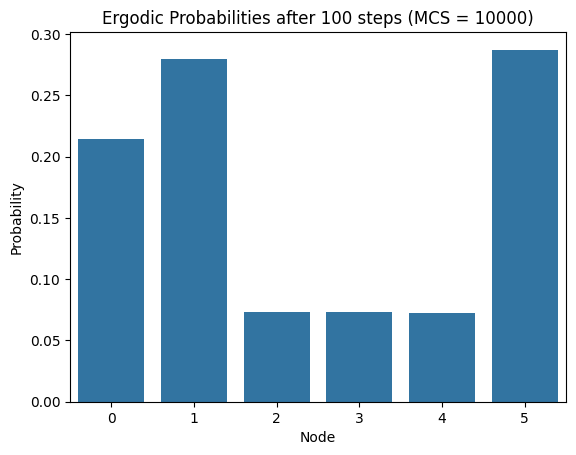

In [38]:
run_ergodic_simulation(steps=100, MCS=10000,adjacency_matrix = adjacency_matrix)

3. G = ({1, 2, 3, 4, 5, 6, 7, 8, 9}, {1 → 2, 2 → 1, 2 → 2, 2 → 6, 2 → 3, 3 → 4, 4 → 5, 5 →
6, 6 → 1, 6 → 6, 6 → 7, 5 → 8, 7 → 9, 8 → 9}). Find PageRank value for each vertex
representing a web-site. Beware that there are some some dead-ends. Assume taxation
parameters β = 0 and 0.1.

In [39]:
#Let G
adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0, 0],  
    [1, 1, 1, 0, 0, 1, 0, 0, 0],  
    [0, 0, 0, 1, 0, 0, 0, 0, 0],  
    [0, 0, 0, 0, 1, 0, 0, 0, 0],  
    [0, 0, 0, 0, 0, 1, 0, 1, 0],  
    [1, 0, 0, 0, 0, 1, 1, 0, 0],  
    [0, 0, 0, 0, 0, 0, 0, 0, 1],  
    [0, 0, 0, 0, 0, 0, 0, 0, 1],  
    [0, 0, 0, 0, 0, 0, 0, 0, 0]
    ])

In [40]:
def calculate_pagerank(adjacency_matrix, beta):
    num_vertices = len(adjacency_matrix)
    out_degree = np.sum(adjacency_matrix, axis=1)
    pagerank = np.ones(num_vertices) / num_vertices
    for _ in range(50): 
        new_pagerank = np.zeros(num_vertices)
        for i in range(num_vertices):
            pointing_to_i = np.where(adjacency_matrix[:, i] == 1)[0]
            for j in pointing_to_i:
                new_pagerank[i] += pagerank[j] / out_degree[j]
        
        new_pagerank = (1 - beta) * new_pagerank + beta / num_vertices
        if np.allclose(new_pagerank, pagerank):
            break
        pagerank = new_pagerank
    return pagerank

In [41]:
pagerank_beta_0 = calculate_pagerank(adjacency_matrix, beta=0)
pagerank_beta_01 = calculate_pagerank(adjacency_matrix, beta=0.1)

print("PageRank with beta = 0:", pagerank_beta_0)
print("PageRank with beta = 0.1:", pagerank_beta_01)

PageRank with beta = 0: [6.79131973e-05 1.10735831e-04 3.20679635e-05 3.71462162e-05
 4.30286563e-05 9.28345144e-05 3.58452338e-05 2.49213171e-05
 7.03894852e-05]
PageRank with beta = 0.1: [0.0457296  0.06744314 0.02628601 0.03476875 0.04240325 0.06481122
 0.0305547  0.03019273 0.06578423]


Generate a directed graph G with n nodes in a following way. For each of n nodes
choose l unique out-neighbours. For such randomly generated structure start a ran-
dom walk of an agent in a randomly chosen vertex. Find the distribution after 1, 2 ,
10, 50, 100 and n steps for all configurations of parameters:
• n = 2, 10, 20, 1000
• l = 1, 2, 5, 10, 20, 50
• β = 0, 0.01, 0.05, 0.1, 0.2


In [42]:
def create_adj_matrix(n, l):
    G = np.zeros((n,n))
    for nodes in range(n):
        indexes = r.sample(range(n),l)
        G[nodes][indexes] = 1
    return G

In [43]:
n = (2,10,20,1000)
l = (1,2,5,10,20,50)
beta = (0,0.01,0.05,0.1,0.2)

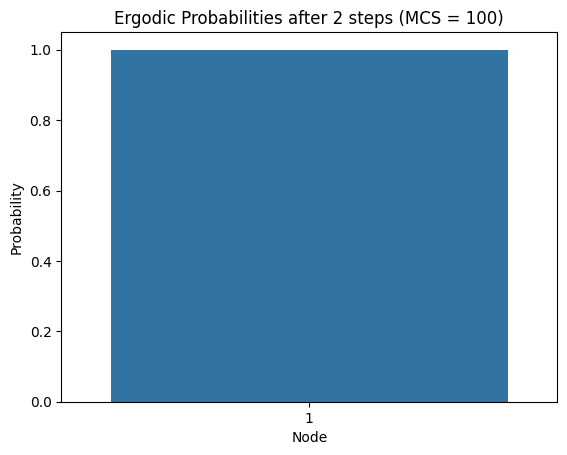

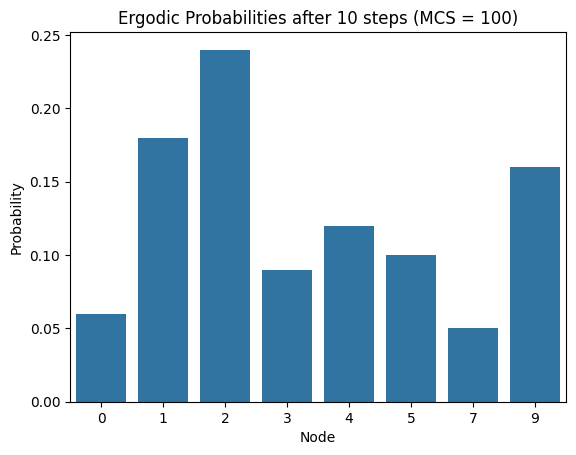

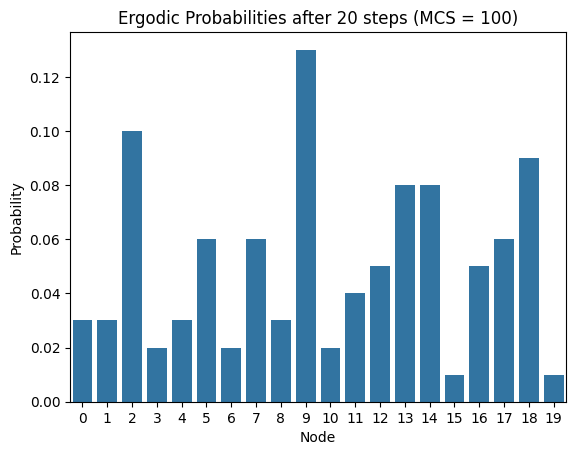

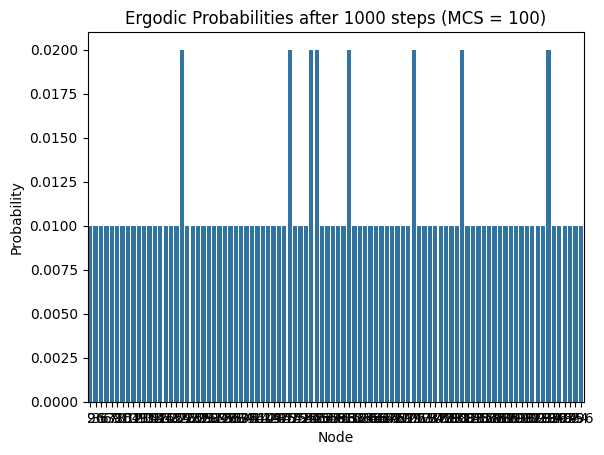

In [47]:
#dint know how to include taxation parameter
for nodes, links in zip(n, l):
    run_ergodic_simulation(steps=nodes, MCS=100,adjacency_matrix = create_adj_matrix(nodes, links))